# **Internship Task**
**Exploratory Fractal Analysis**

---

Task- Which class is more complex?

Sub-Task- which fractal analysis method gives better
results?

### Notebook Structure

> Exploratory Data Analysis

> Exploratory Fractal Analysis


# Exploratory Data Analysis

In [1]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as st
import imageio

In [2]:
#reading the data
data = pd.read_csv('intern_dataset.csv')

In [3]:
#checking some of the data and its shape
print('shape of the data is ->', data.shape)
data.head()

shape of the data is -> (912000, 4)


,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [4]:
#describing the data a bit more
data.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


In [5]:
#Getting unique values and their percentages in the data
data['Label'].value_counts()/len(data)*100

A    34.868421
B    34.210526
C    30.921053
Name: Label, dtype: float64

In [6]:
#checking if data contains any null value
data.isnull().sum()

Time       0
Signal1    0
Signal2    0
Label      0
dtype: int64

In [7]:
#analysing Time feature
print('Minimum Time-> (',data['Time'].min(),') Maximum Time-> (',data['Time'].max(),')')

Minimum Time-> ( 2017-08-12 11:08:25.785 ) Maximum Time-> ( 2020-01-04 10:55:49.226 )


NOTE- Below Graphs are showing time from low to high as left to right.

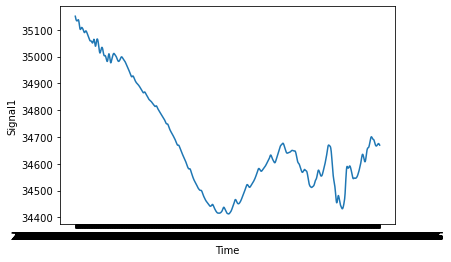

In [8]:
#The dataset is very huge so plotting some of its values for signal1
sns.lineplot(data=data[::-1][0:2000][::-1],x="Time",y="Signal1")
plt.show()

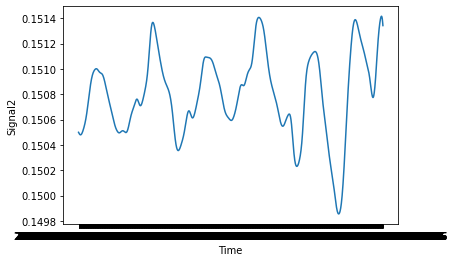

In [9]:
#For signal2 also.
sns.lineplot(data=data[::-1][0:2000][::-1],x="Time",y="Signal2")
plt.show()

In [10]:
#Found it on Github
def calc_rms(x, scale):
    """
    windowed Root Mean Square (RMS) with linear detrending.
    
    Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale* : int
        length of the window in which RMS will be calculaed
    Returns:
    --------
      *rms* : numpy.array
        RMS data in each window with length len(x)//scale
    """
    # making an array with data divided in windows
    shape = (x.shape[0]//scale, scale)
    X = np.lib.stride_tricks.as_strided(x,shape=shape)
    # vector of x-axis points to regression
    scale_ax = np.arange(scale)
    rms = np.zeros(X.shape[0])
    for e, xcut in enumerate(X):
        coeff = np.polyfit(scale_ax, xcut, 1)
        xfit = np.polyval(coeff, scale_ax)
        # detrending and computing RMS of each window
        rms[e] = np.sqrt(np.mean((xcut-xfit)**2))
    return rms

def dfa(x, scale_lim=[7,12], scale_dens=0.125, show=False):
    """
    Detrended Fluctuation Analysis - measures power law scaling coefficient
    of the given signal *x*.
    More details about the algorithm you can find e.g. here:
    Hardstone, R. et al. Detrended fluctuation analysis: A scale-free 
    view on neuronal oscillations, (2012).
    Args:
    -----
      *x* : numpy.array
        one dimensional data vector
      *scale_lim* = [5,9] : list of length 2 
        boundaries of the scale, where scale means windows among which RMS
        is calculated. Numbers from list are exponents of 2 to the power
        of X, eg. [5,9] is in fact [2**5, 2**9].
        You can think of it that if your signal is sampled with F_s = 128 Hz,
        then the lowest considered scale would be 2**5/128 = 32/128 = 0.25,
        so 250 ms.
      *scale_dens* = 0.25 : float
        density of scale divisions, eg. for 0.25 we get 2**[5, 5.25, 5.5, ... ] 
      *show* = False
        if True it shows matplotlib log-log plot.
    Returns:
    --------
      *scales* : numpy.array
        vector of scales (x axis)
      *fluct* : numpy.array
        fluctuation function values (y axis)
      *alpha* : float
        estimation of DFA exponent
    """
    # cumulative sum of data with substracted offset
    y = np.cumsum(x - np.mean(x))
    scales = (2**np.arange(scale_lim[0], scale_lim[1], scale_dens)).astype(np.int)
    fluct = np.zeros(len(scales))
    # computing RMS for each window
    for e, sc in enumerate(scales):
        fluct[e] = np.sqrt(np.mean(calc_rms(y, sc)**2))
    # fitting a line to rms data
    coeff = np.polyfit(np.log2(scales), np.log2(fluct), 1)
    if show:
        fluctfit = 2**np.polyval(coeff,np.log2(scales))
        plt.loglog(scales, fluct, 'bo')
        plt.loglog(scales, fluctfit, 'r', label=r'$\alpha$ = %0.2f'%coeff[0])
        plt.title('DFA')
        plt.xlabel(r'$\log_{10}$(time window)')
        plt.ylabel(r'$\log_{10}$<F(t)>')
        plt.legend()
        plt.show()
        print(coeff)
    return scales, fluct, coeff[0]

# **Exploratory Fractal Analysis**

In [11]:
class_a = data[data['Label']=='A']
class_b = data[data['Label']=='B']
class_c = data[data['Label']=='C']

## Label 1

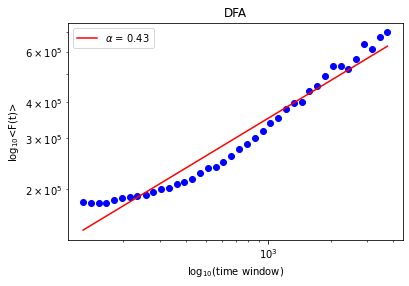

[ 0.43435589 14.09865339]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[179970.61864493 179575.66372176 178918.41859405 179779.55871306
 183320.00275437 187112.19003281 188235.160696   189956.82871642
 190606.06094971 195630.62514828 200434.79788881 202760.62813164
 208247.21291975 212628.38549078 216821.12925732 226961.71729103
 237267.47372427 239307.35775281 249216.94301663 260161.44224165
 276188.4408097  286696.39960865 300573.47205157 319577.57634583
 339152.85162434 354042.80923073 379494.55786132 398478.92198849
 401066.36244869 437273.33450585 456856.78401401 492296.12251828
 533913.97471995 533786.07266654 523803.88219561 565409.81379849
 637158.4075579  613475.07809862 673479.00799559 698914.53735544]
DFA exponent: 0.4343558864843251


In [12]:
series_A = np.array(class_a['Signal1'])
scales, fluct, alpha = dfa(series_A, show=1)
print(scales)
print(fluct)
print("DFA exponent:",format(alpha))

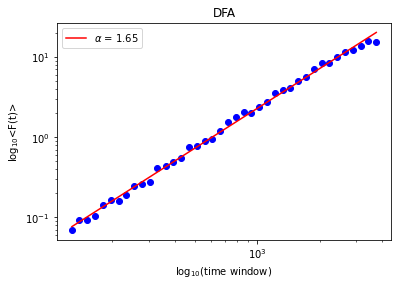

[  1.6496556  -15.25487527]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[ 0.06920572  0.09363789  0.09382781  0.10477507  0.14319098  0.16382336
  0.15775007  0.18816034  0.2426176   0.25908701  0.27556796  0.40711476
  0.43961958  0.48996303  0.54561435  0.75488882  0.77300227  0.88825344
  0.9574906   1.18670458  1.53553434  1.79148859  2.0273061   2.01703136
  2.34696494  2.74843235  3.51898024  3.89899389  4.03769052  4.99797272
  5.6189012   6.99927603  8.46580972  8.40044748 10.03011467 11.49641578
 12.17829342 13.71902012 15.73644641 15.32945339]
DFA exponent: 1.6496555975291414


In [13]:
# Performing DFA for Signal-2 in label A
series_A = np.array(data['Signal2'])
scales, fluct, alpha = dfa(series_A, show=True)
# 12000 values suggest 20 minutes of data.
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

## Label B

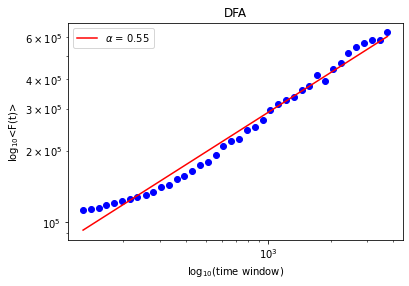

[ 0.55493507 12.61682739]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[112852.07995634 113759.2803457  115450.67481785 117987.37301746
 120214.25372151 122868.8708788  125433.63678692 127232.2653784
 130135.01484378 134659.59636228 140229.44594286 144050.62335219
 152238.21269983 157305.00130159 163797.57044686 173543.30026958
 178698.51235229 191547.14656691 209534.82097586 218870.05942166
 225109.49119774 245007.65405293 251399.78036877 269977.35860314
 295948.49425209 316012.31945639 326801.23050803 337020.35464487
 359842.21355768 374605.86401171 418191.69956271 394957.61475689
 441014.14708867 468898.9699563  513597.93313441 546207.51389547
 565165.85202303 587135.42157878 582839.97925791 629006.00035126]
DFA exponent: 0.5549350688857242


In [14]:
# DFA for signal 1 label B
series_B = np.array(class_b['Signal1'])
scales, fluct, alpha = dfa(series_B, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

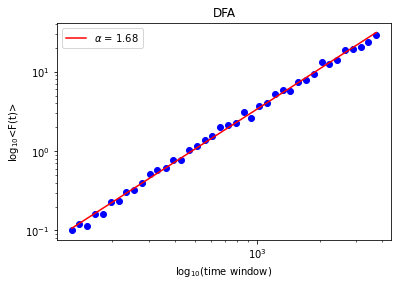

[  1.67943204 -14.98150164]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[ 0.10099712  0.12104013  0.11392022  0.16128753  0.16004023  0.22789328
  0.23530853  0.30326049  0.32620171  0.40124494  0.51484008  0.57248858
  0.6170788   0.77323059  0.77779807  1.01744823  1.14724001  1.37326871
  1.52747527  2.01586318  2.12912817  2.26237624  3.13383903  2.58395131
  3.73906808  4.03225337  5.2379581   5.94265744  5.71337387  7.35068226
  7.83883496  9.41756622 13.07585167 12.62503465 13.88978547 18.69317756
 19.40404597 20.41806549 23.54340924 28.54322204]
DFA exponent: 1.679432043613159


In [15]:
# DFA for label B signal 2
series_B = np.array(class_b['Signal2'])
scales, fluct, alpha = dfa(series_B, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

## Label C

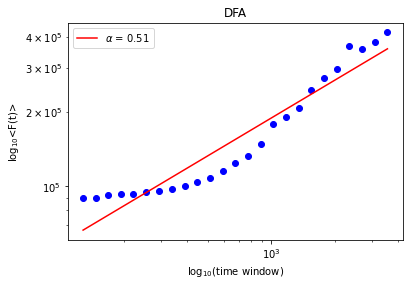

[ 0.50532547 12.48630294]
[ 128  147  168  194  222  256  294  337  388  445  512  588  675  776
  891 1024 1176 1351 1552 1782 2048 2352 2702 3104 3565]
[ 89786.43006702  89759.96735486  91963.94034232  93246.29250362
  93154.80357433  94779.14994651  95317.18404986  97852.05719801
 100396.81179798 104218.13126614 107929.01015689 115386.77678542
 124593.71703769 132677.90064745 148413.76534178 177437.69072324
 189283.66427331 207532.64414275 243587.82330001 272887.93655867
 295396.59656756 366043.86329536 356108.56542289 381857.75070487
 416481.61871772]
DFA exponent: 0.5053254725406225


In [16]:
# DFA for signal C
series_C = np.array(class_c['Signal1'])
scales, fluct, alpha = dfa(series_C, scale_dens=0.2 ,show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

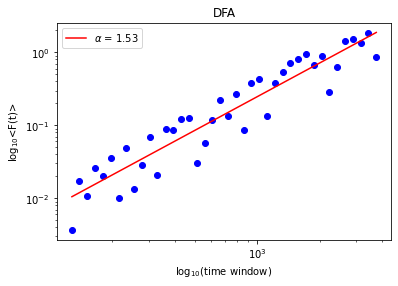

[  1.5345393  -17.31509579]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[0.00365648 0.01713365 0.01087562 0.02609452 0.02044232 0.03517965
 0.0099679  0.04931901 0.01326164 0.02891575 0.06934582 0.02112624
 0.08782635 0.08637113 0.12039242 0.12666996 0.03001576 0.05787409
 0.11742222 0.22079841 0.13447679 0.26469191 0.08714993 0.38020952
 0.43243645 0.13550867 0.38283173 0.53882108 0.71261468 0.80533525
 0.95864921 0.67619305 0.87961929 0.28505953 0.63973128 1.44657774
 1.53614206 1.3278582  1.82175812 0.87085098]
DFA exponent: 1.5345393007082215


In [17]:
# Label C, Signal 2
series_C = np.array(class_c['Signal2'])
scales, fluct, alpha = dfa(series_C, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

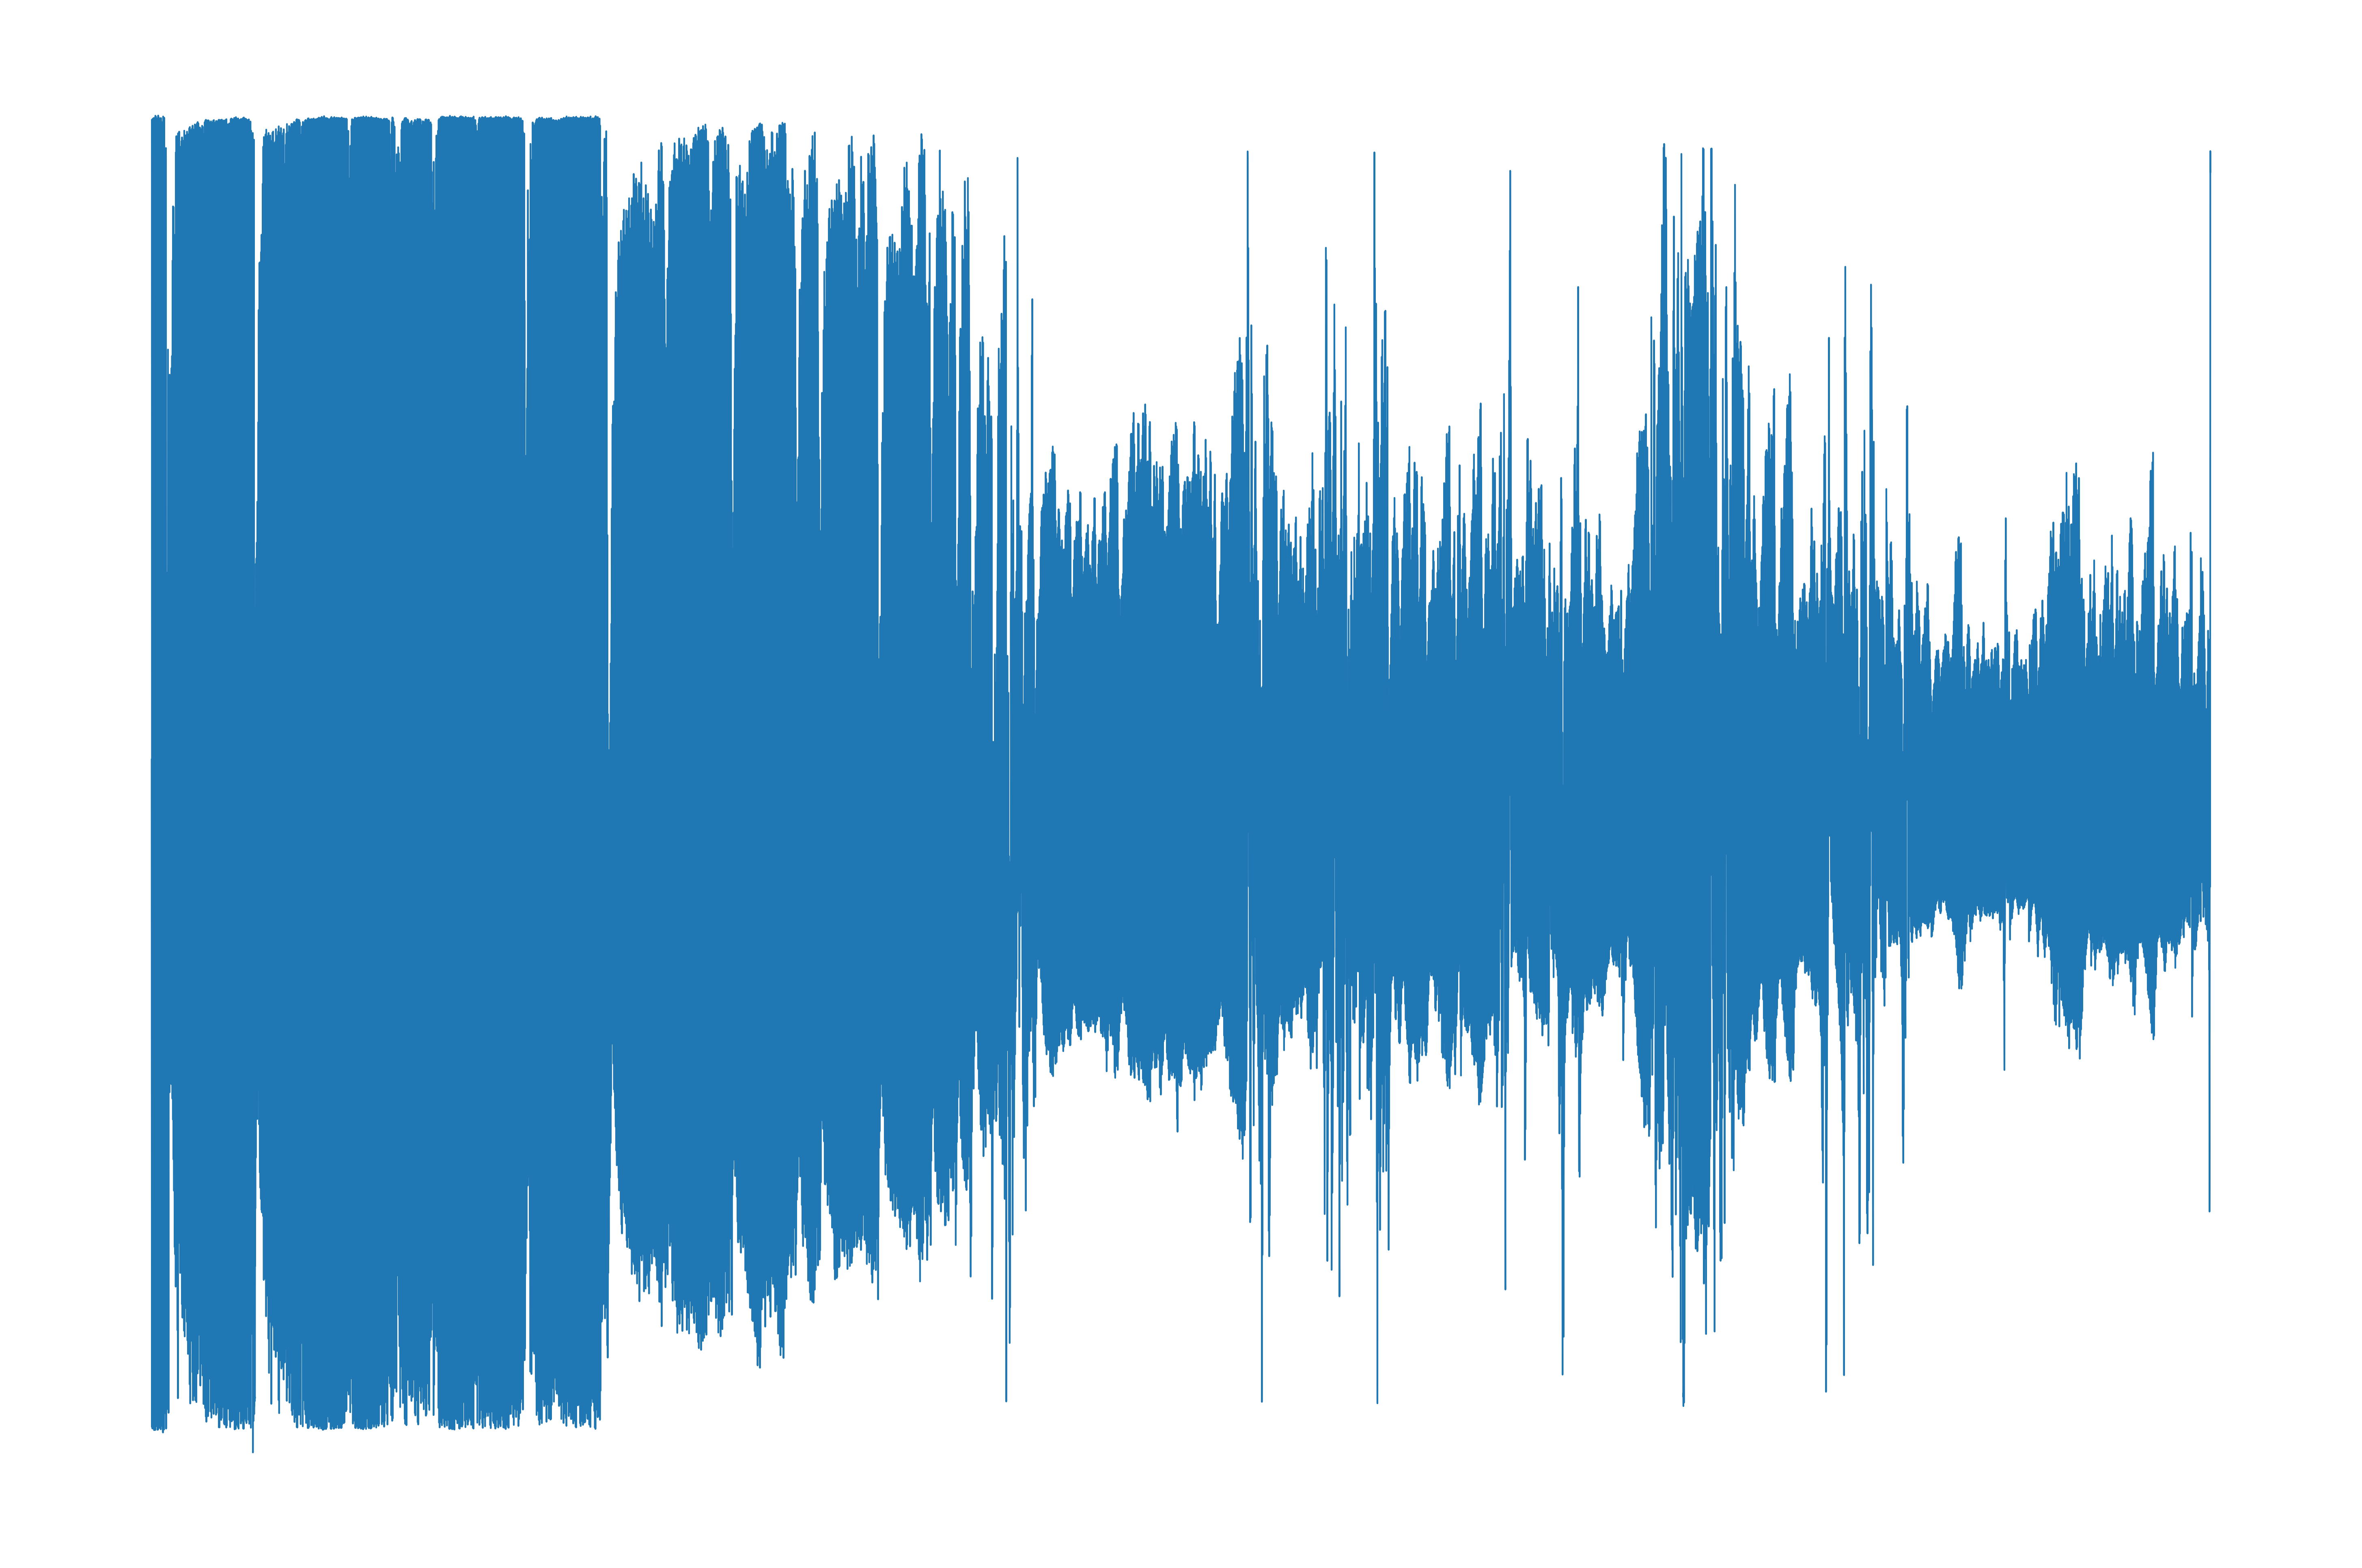

In [18]:
plt.figure(dpi=1200)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(class_a['Signal1']), linewidth = 0.25)
plt.show()

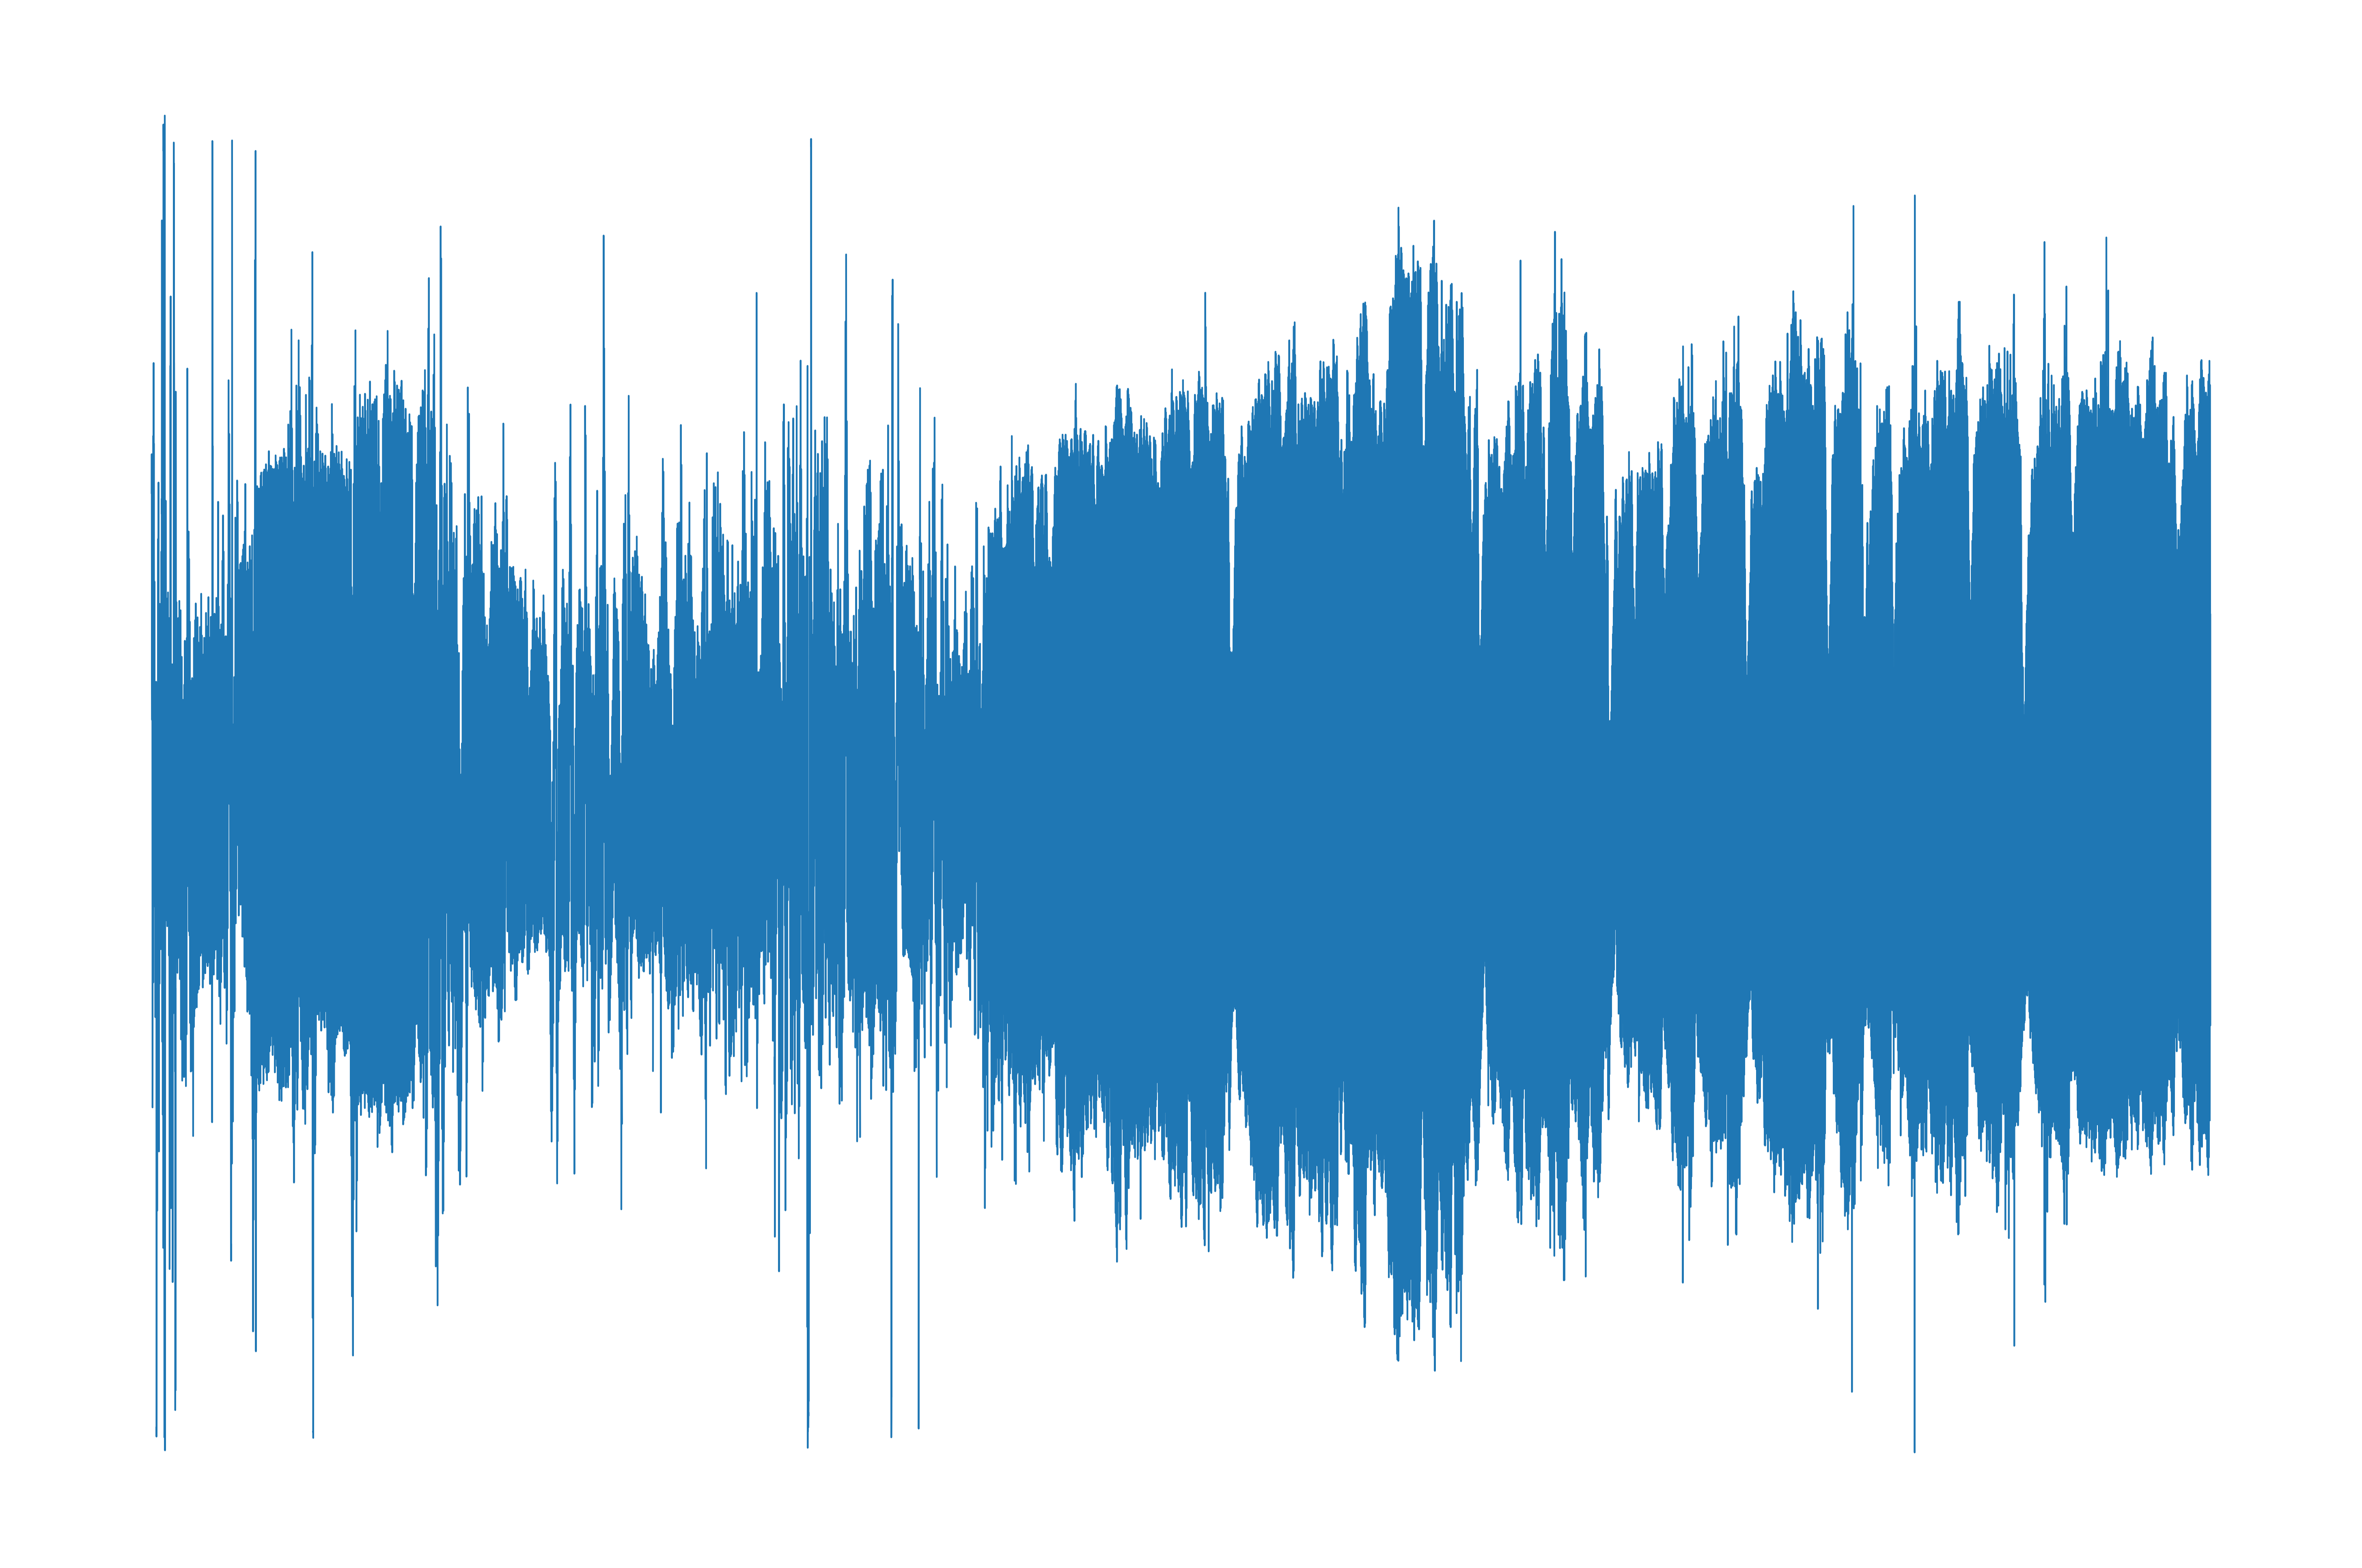

In [19]:
plt.figure(dpi=1200)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(class_b['Signal1']), linewidth = 0.25)
plt.show()

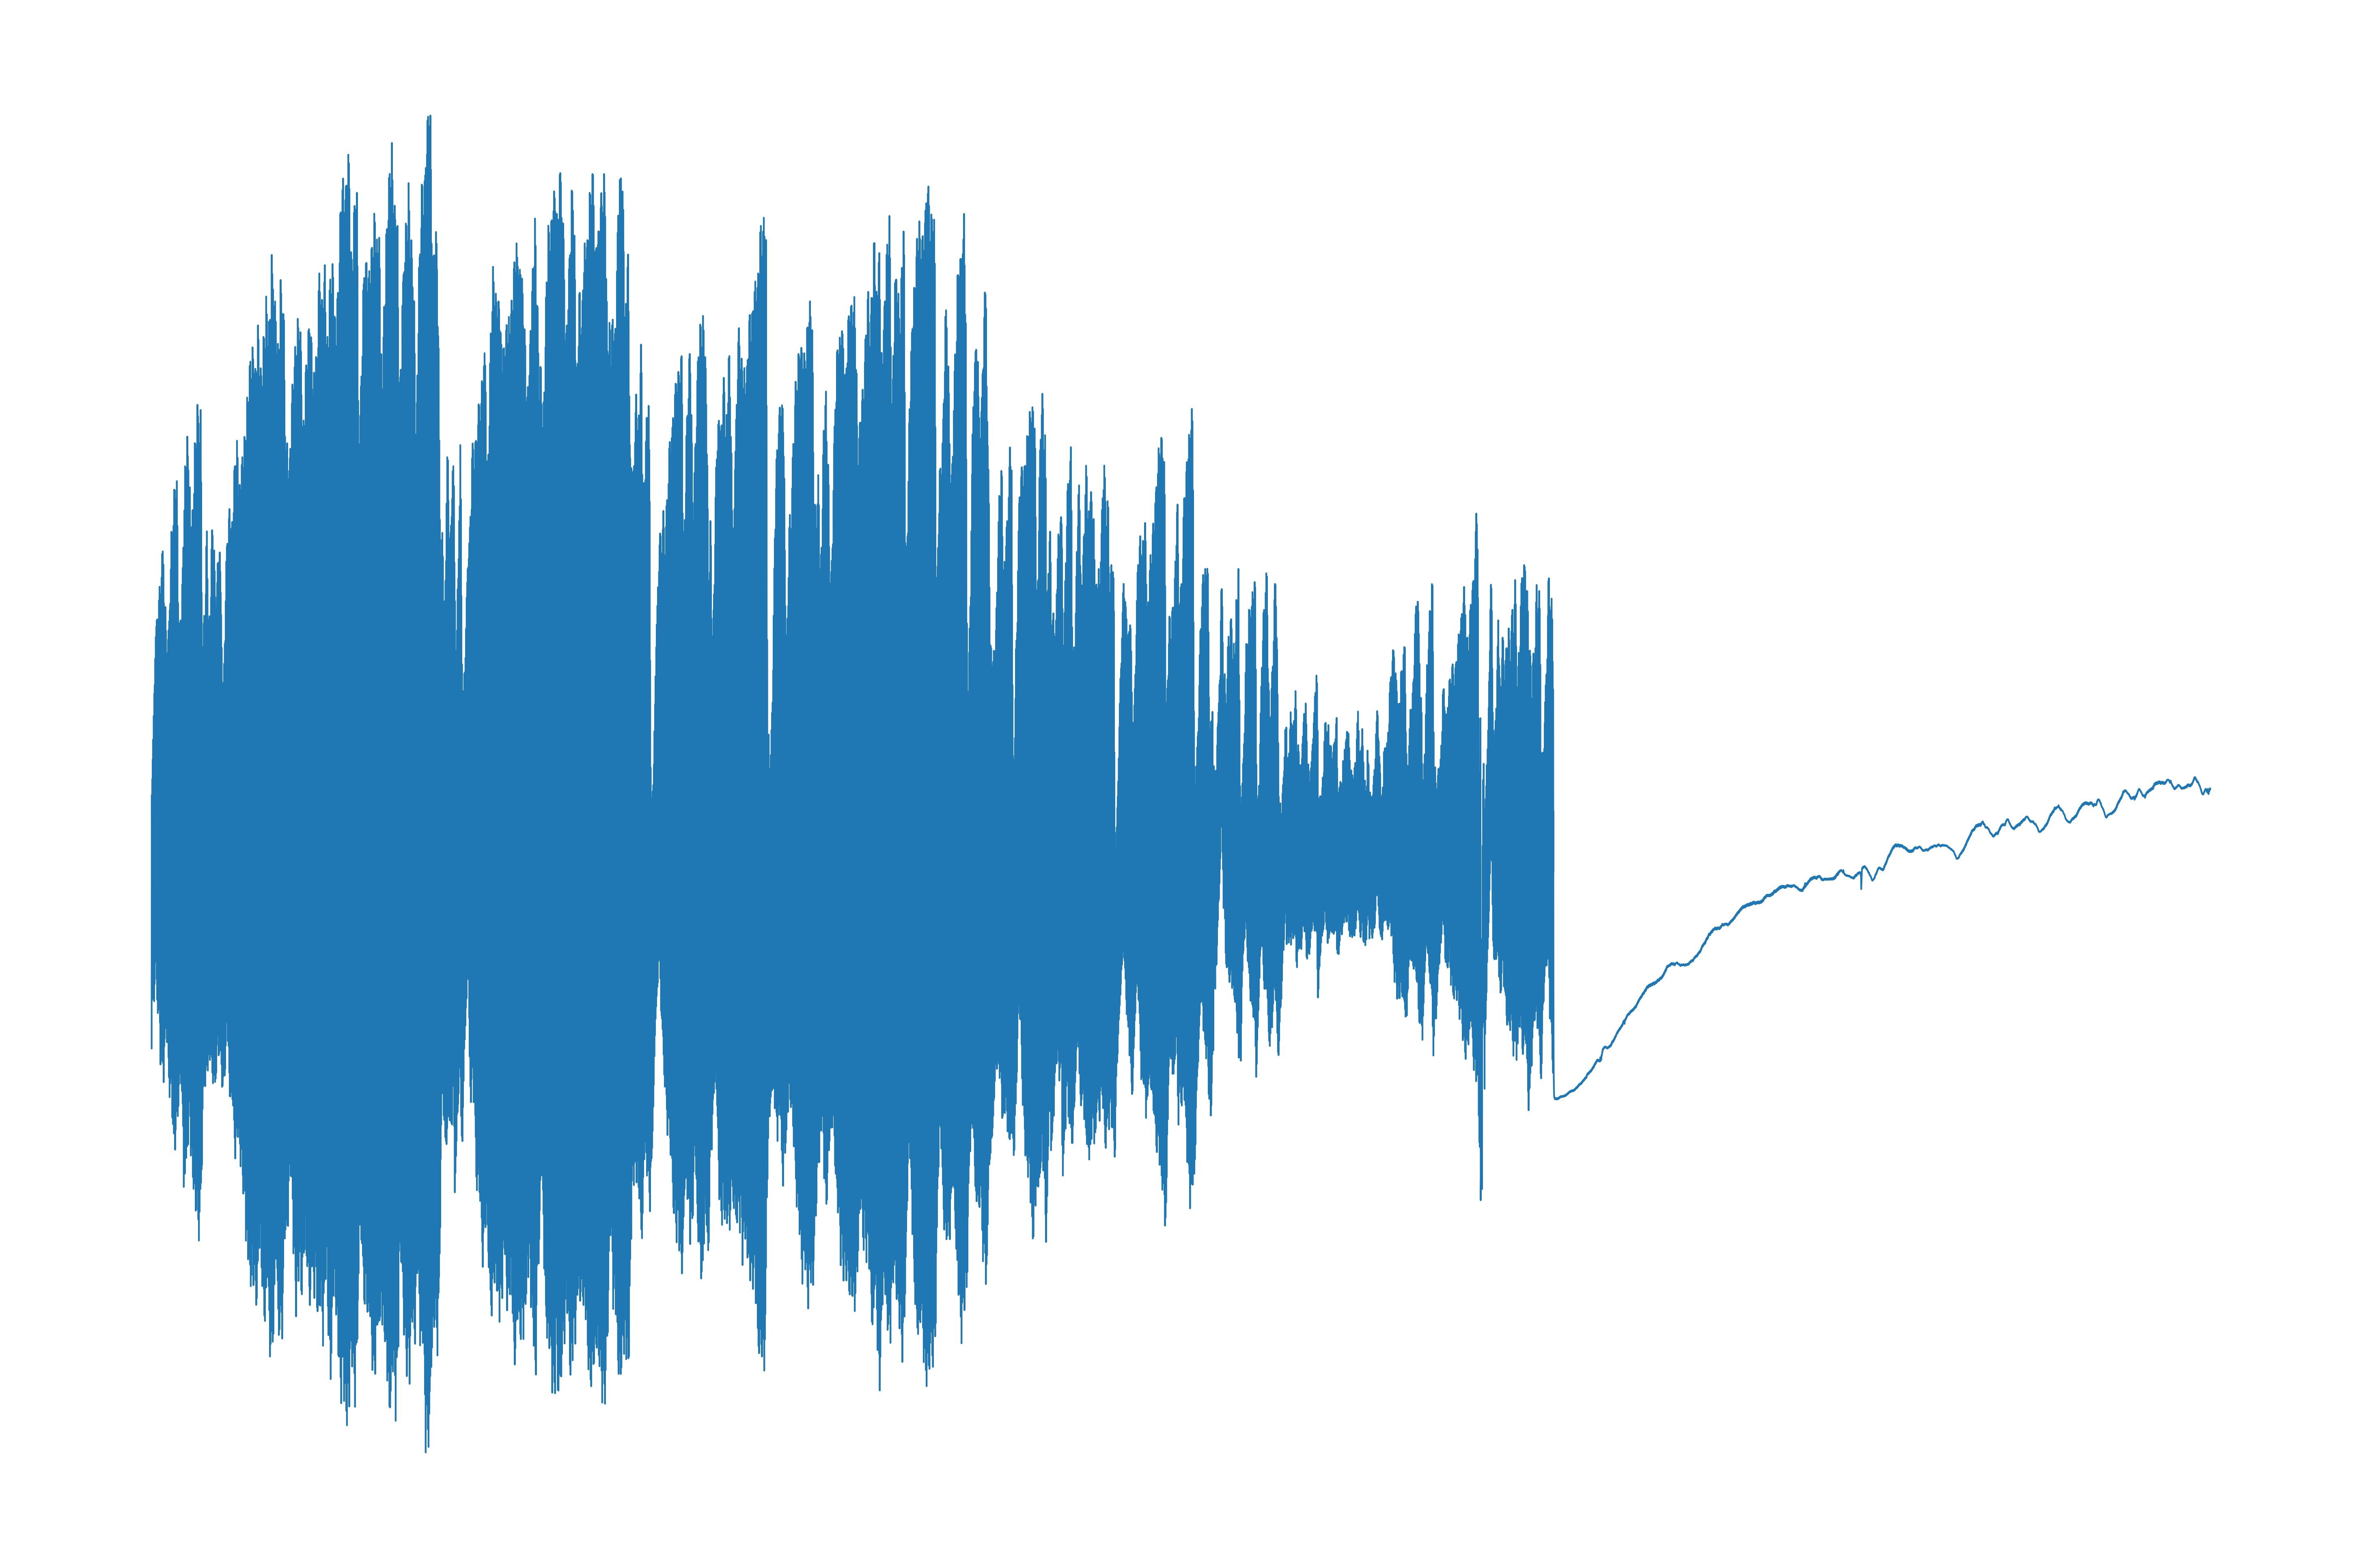

In [20]:
plt.figure(dpi=1200)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(class_c['Signal1']), linewidth = 0.25)
plt.show()
# The end at C you can see a higher order trend in C.

## Hurst Exponents->
    Hurst exponent A:0.53303
    Hurst exponent B:0.52087
    Hurst exponent C:0.43018 (when Scale limit was (32, 430))
I changed the scale array,for some graphs(A's component went below 0.49)
NOTE-The data as you can see, mean , median and mode will do little to nothing to explain the data and this increases the importance of fractal analysis.

As we can see Labels A and B, signal 1, has successful detrending, the hurst values in the correct range, changing the scale of the DFA had pronounced effect on DFA component, I changed the Scale array multiple times, Signal 1 in label A and B had very little effect, I conclude that the DFA was successful and the classes A and B are less complex when compared to C.

# Conclusion: Classes C is more complex than A and B.¶
    * The hurst value for the label A signal 1: a look at the first 700 values and anyone can conclude that this is a mean-reverting time series, but that would be nothing but an error when I took into account the whole 318k+ values of the data and calculated the Hurst component (0.533) it suggests that the time series is a Brownian random motion(referred to as the drunkard's walk) that, there is no correlation in the future values of the data with the current observed one, it is equally likely for an increase or decrease in the time series.
    
    * The interpretation for label B signal 1: I expected this to have more Hurst component, at least more than A1, but it is close to a part of Brownian random motion, with no correlation between the future value and the current observed values.
    
    * For label C and signal 1: This class and signal saw many irregularities; the Hurst values change rapidly with the change in scale, but fitting the linear line would be an error as the curve suggests the presence of a higher-order trend in data. It is more complicated compared to class A and B.
    
    * It would have been fun to get a Hurst value more than 0.5 closer to 1, to watch a real natural phenomenon in the plots. Fractal dimension came up a lot in the material I read for this assignment, and so I will calculate the fractal dimension of signal one all labels cause I am curious

# Signal 2 for all the classes

<AxesSubplot:>

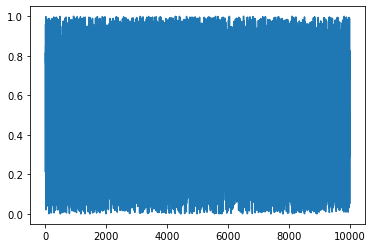

In [21]:
np.random.seed(998)
demo = np.random.uniform(size = 10000)
sns.lineplot(data  = demo)

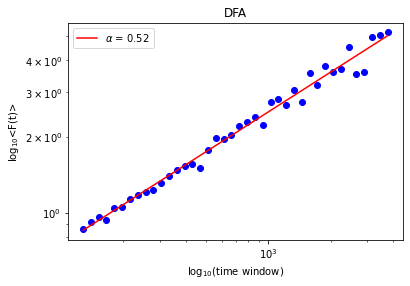

[ 0.52415498 -3.89913478]
[ 128  139  152  165  181  197  215  234  256  279  304  331  362  394
  430  469  512  558  608  663  724  789  861  939 1024 1116 1217 1327
 1448 1579 1722 1878 2048 2233 2435 2655 2896 3158 3444 3756]
[0.85800741 0.92093359 0.96373751 0.93276186 1.04730273 1.04948557
 1.12712629 1.17937335 1.20442894 1.22812268 1.31444109 1.39936114
 1.47869175 1.52772338 1.56194894 1.50753383 1.77402582 1.98051106
 1.95581742 2.02843464 2.19335631 2.28582427 2.39364143 2.22250992
 2.73912255 2.80927642 2.65702126 3.04511827 2.73773157 3.55264231
 3.18445856 3.79157193 3.59833195 3.70849155 4.51205565 3.52266829
 3.60741035 4.95043039 5.0566727  5.1614663 ]
DFA exponent: 0.5241549837168884


In [22]:
scales, fluct, alpha = dfa(demo, show=1)
print(scales)
print(fluct)
print("DFA exponent: {}".format(alpha))

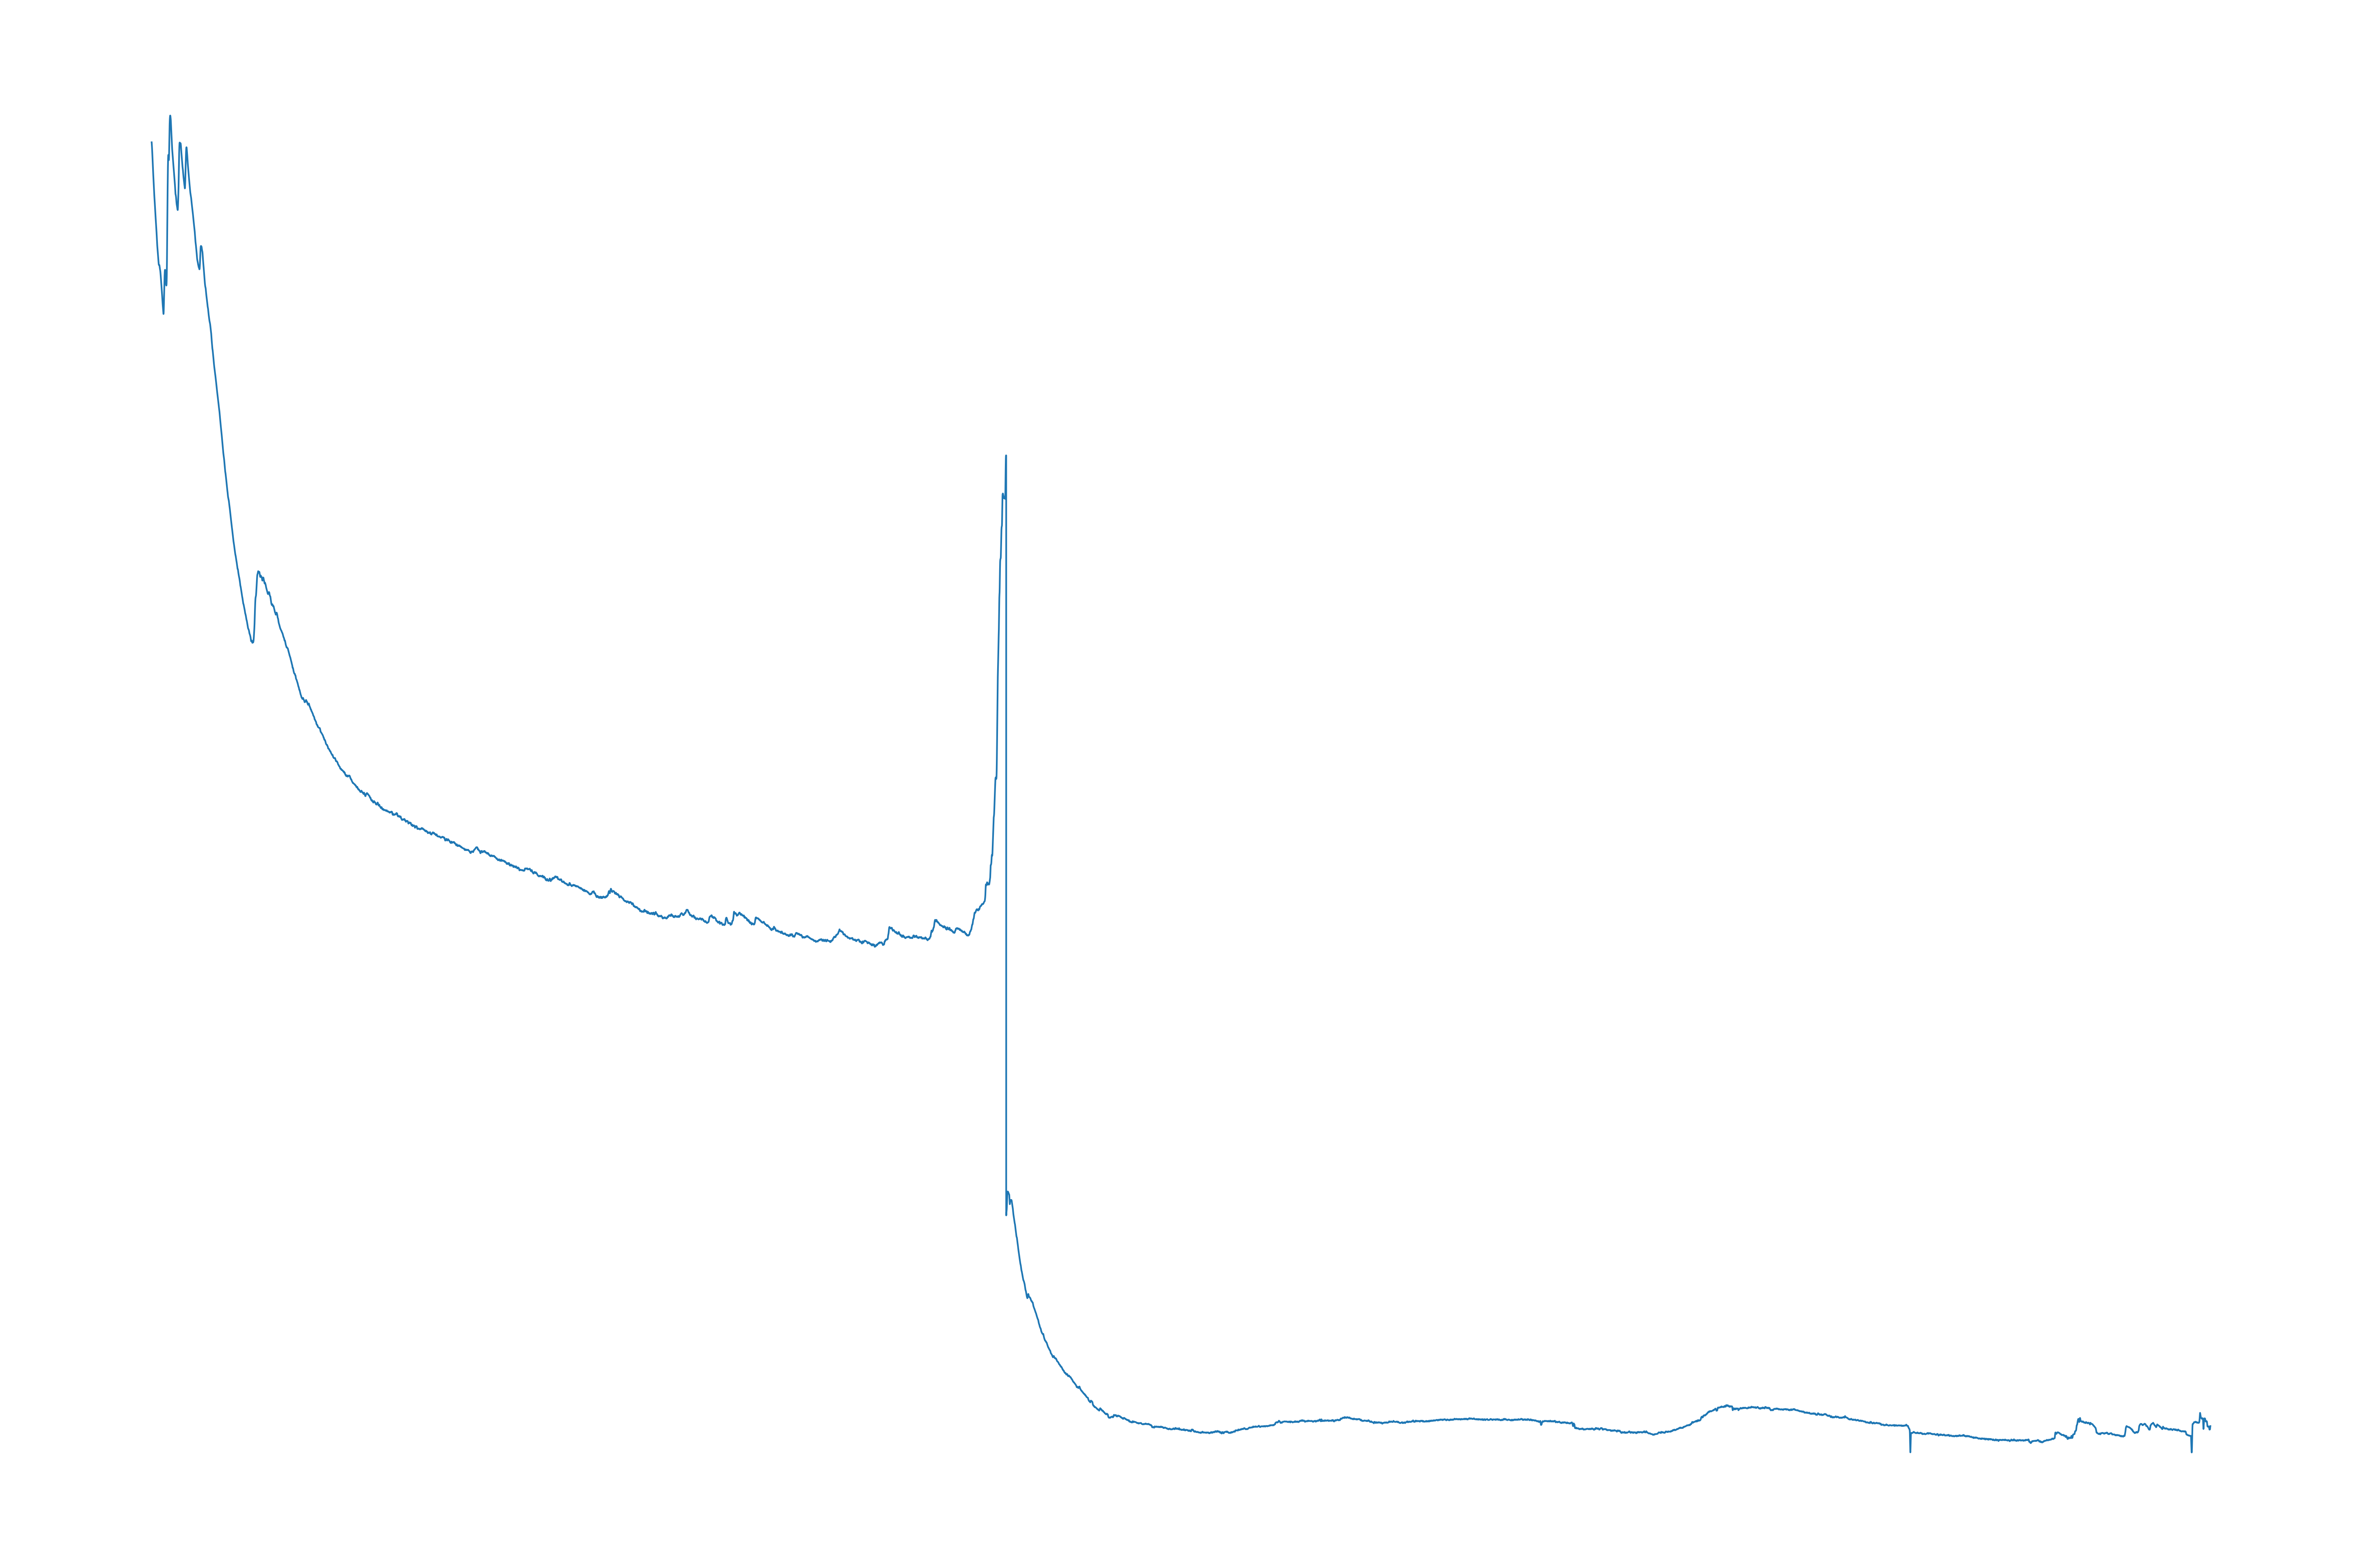

In [23]:
plt.figure(dpi = 1200)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(class_a['Signal2']),linewidth = 0.25)
plt.savefig('A_2.png', dpi = 1200)
plt.show()

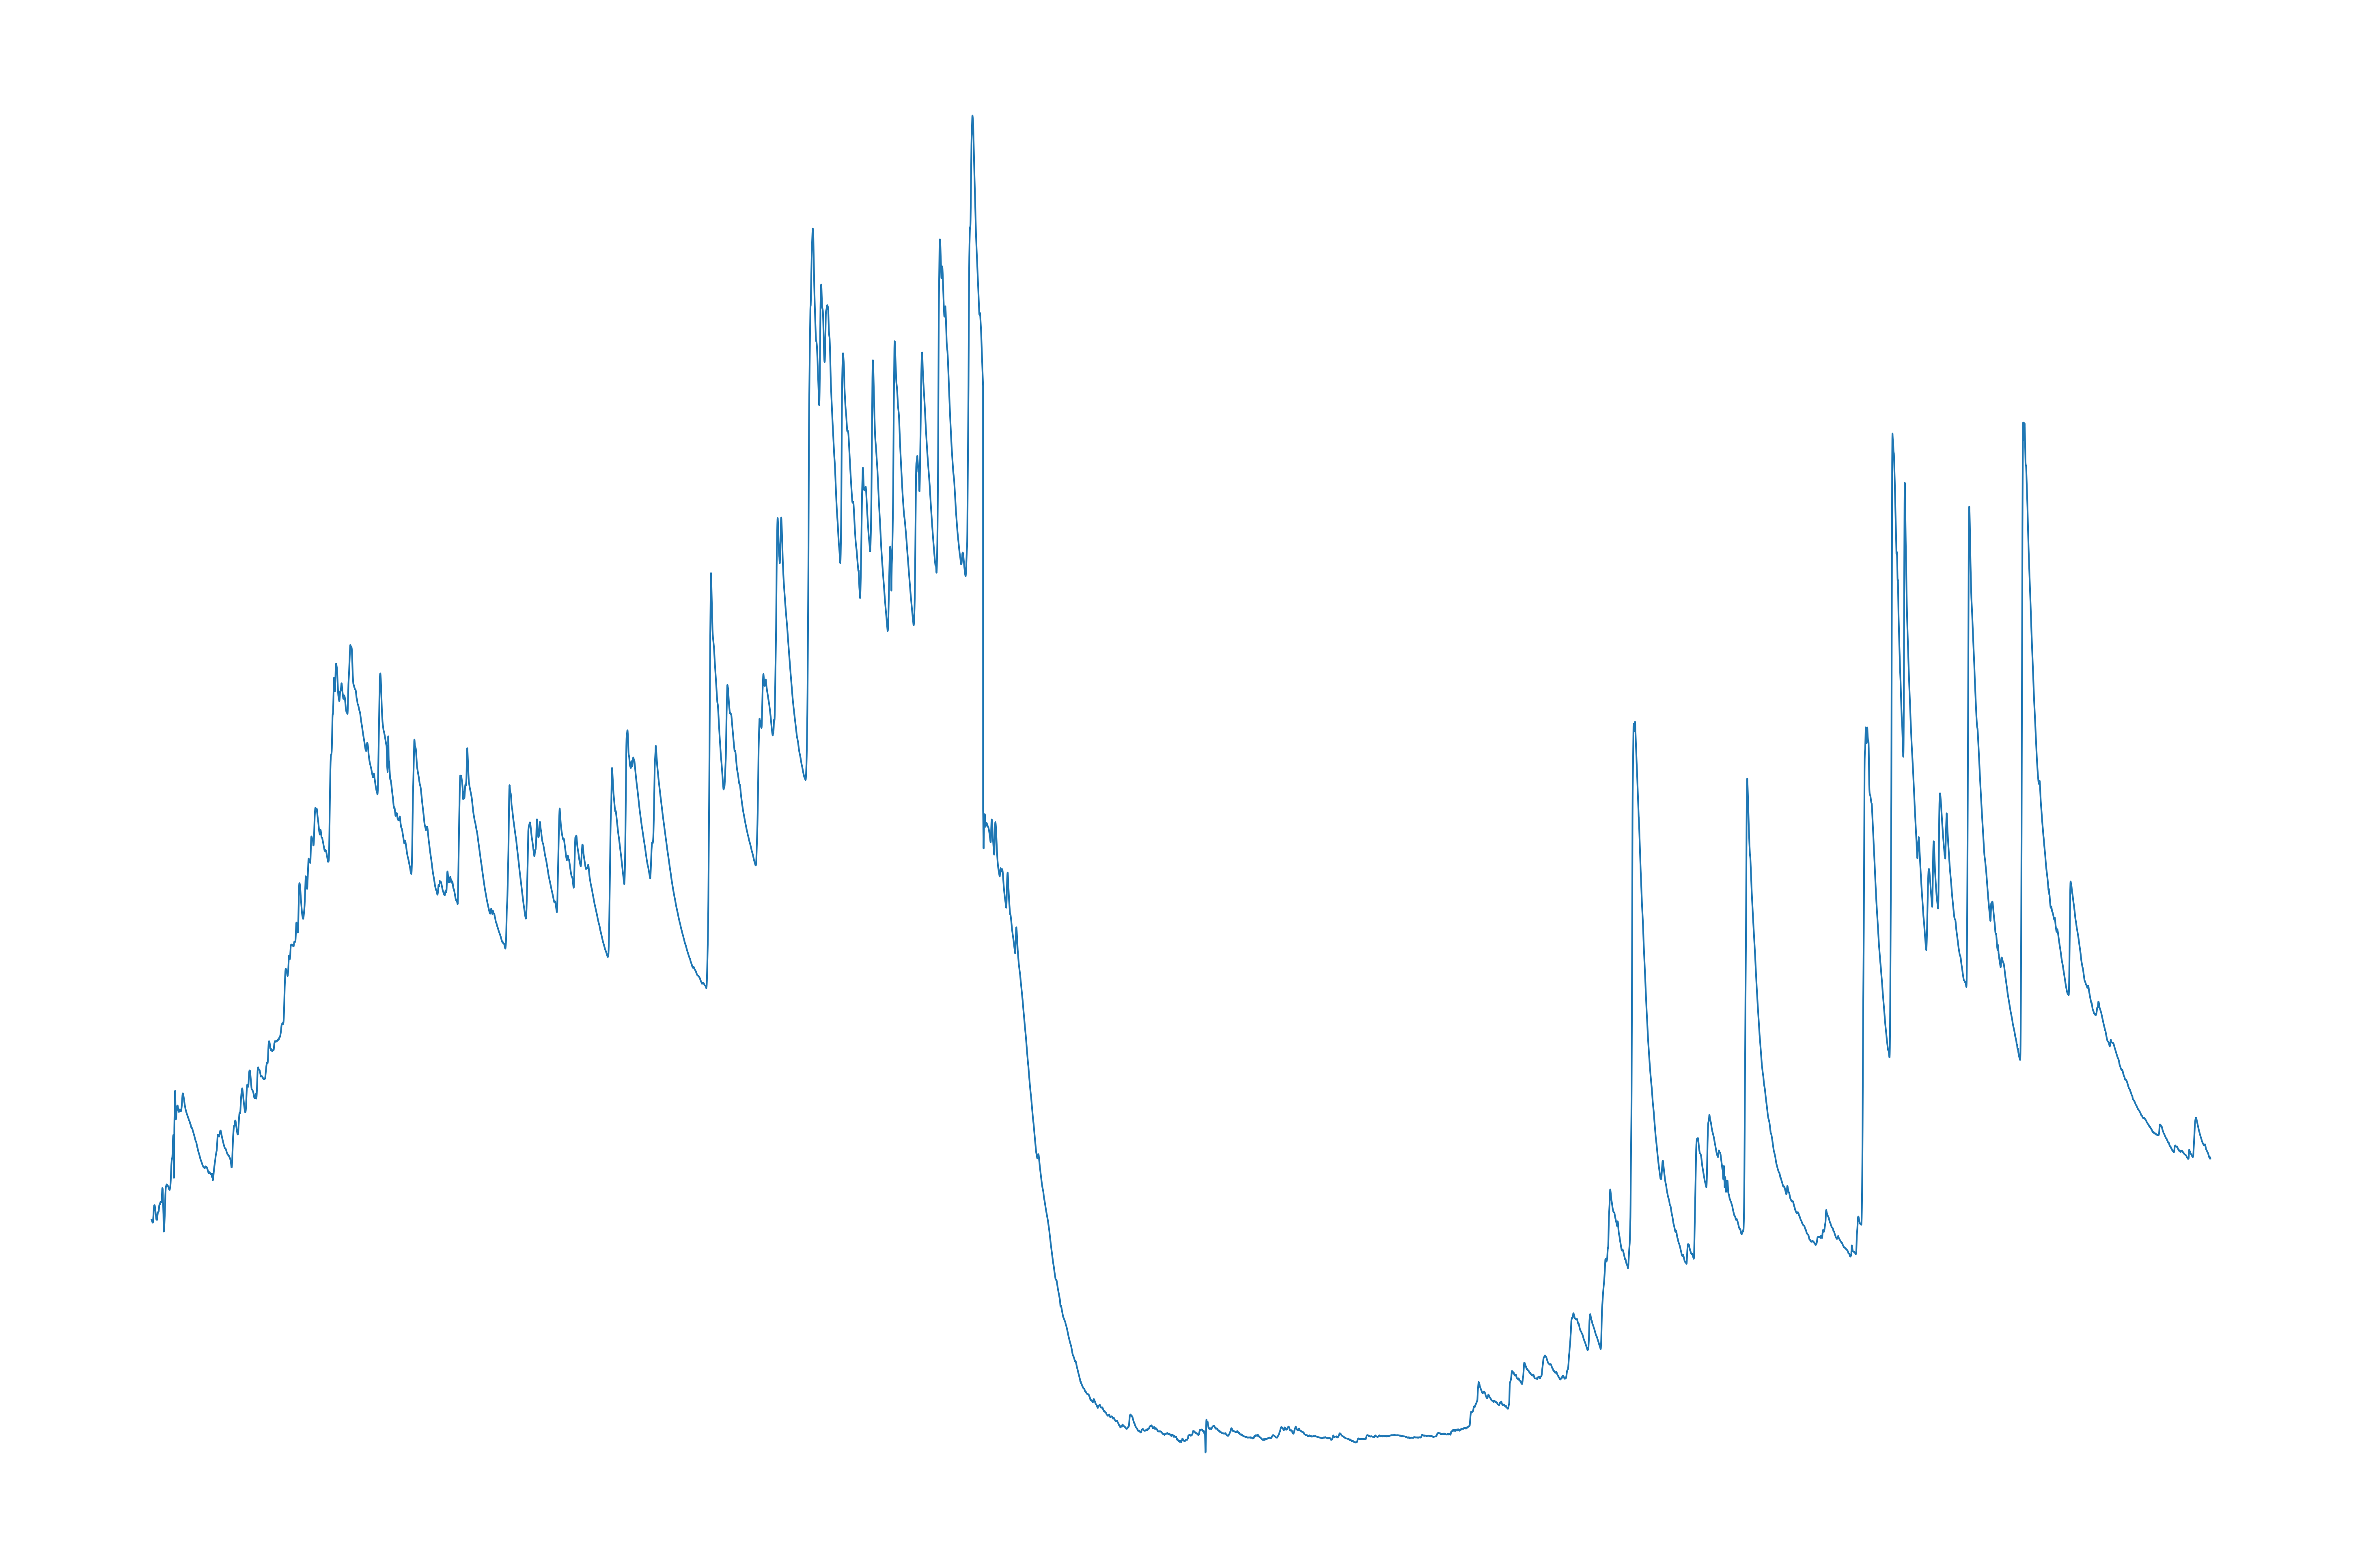

In [24]:
plt.figure(dpi = 1200)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(class_b['Signal2']), linewidth = 0.25)
plt.savefig('B_2.png', dpi = 1200)
plt.show()

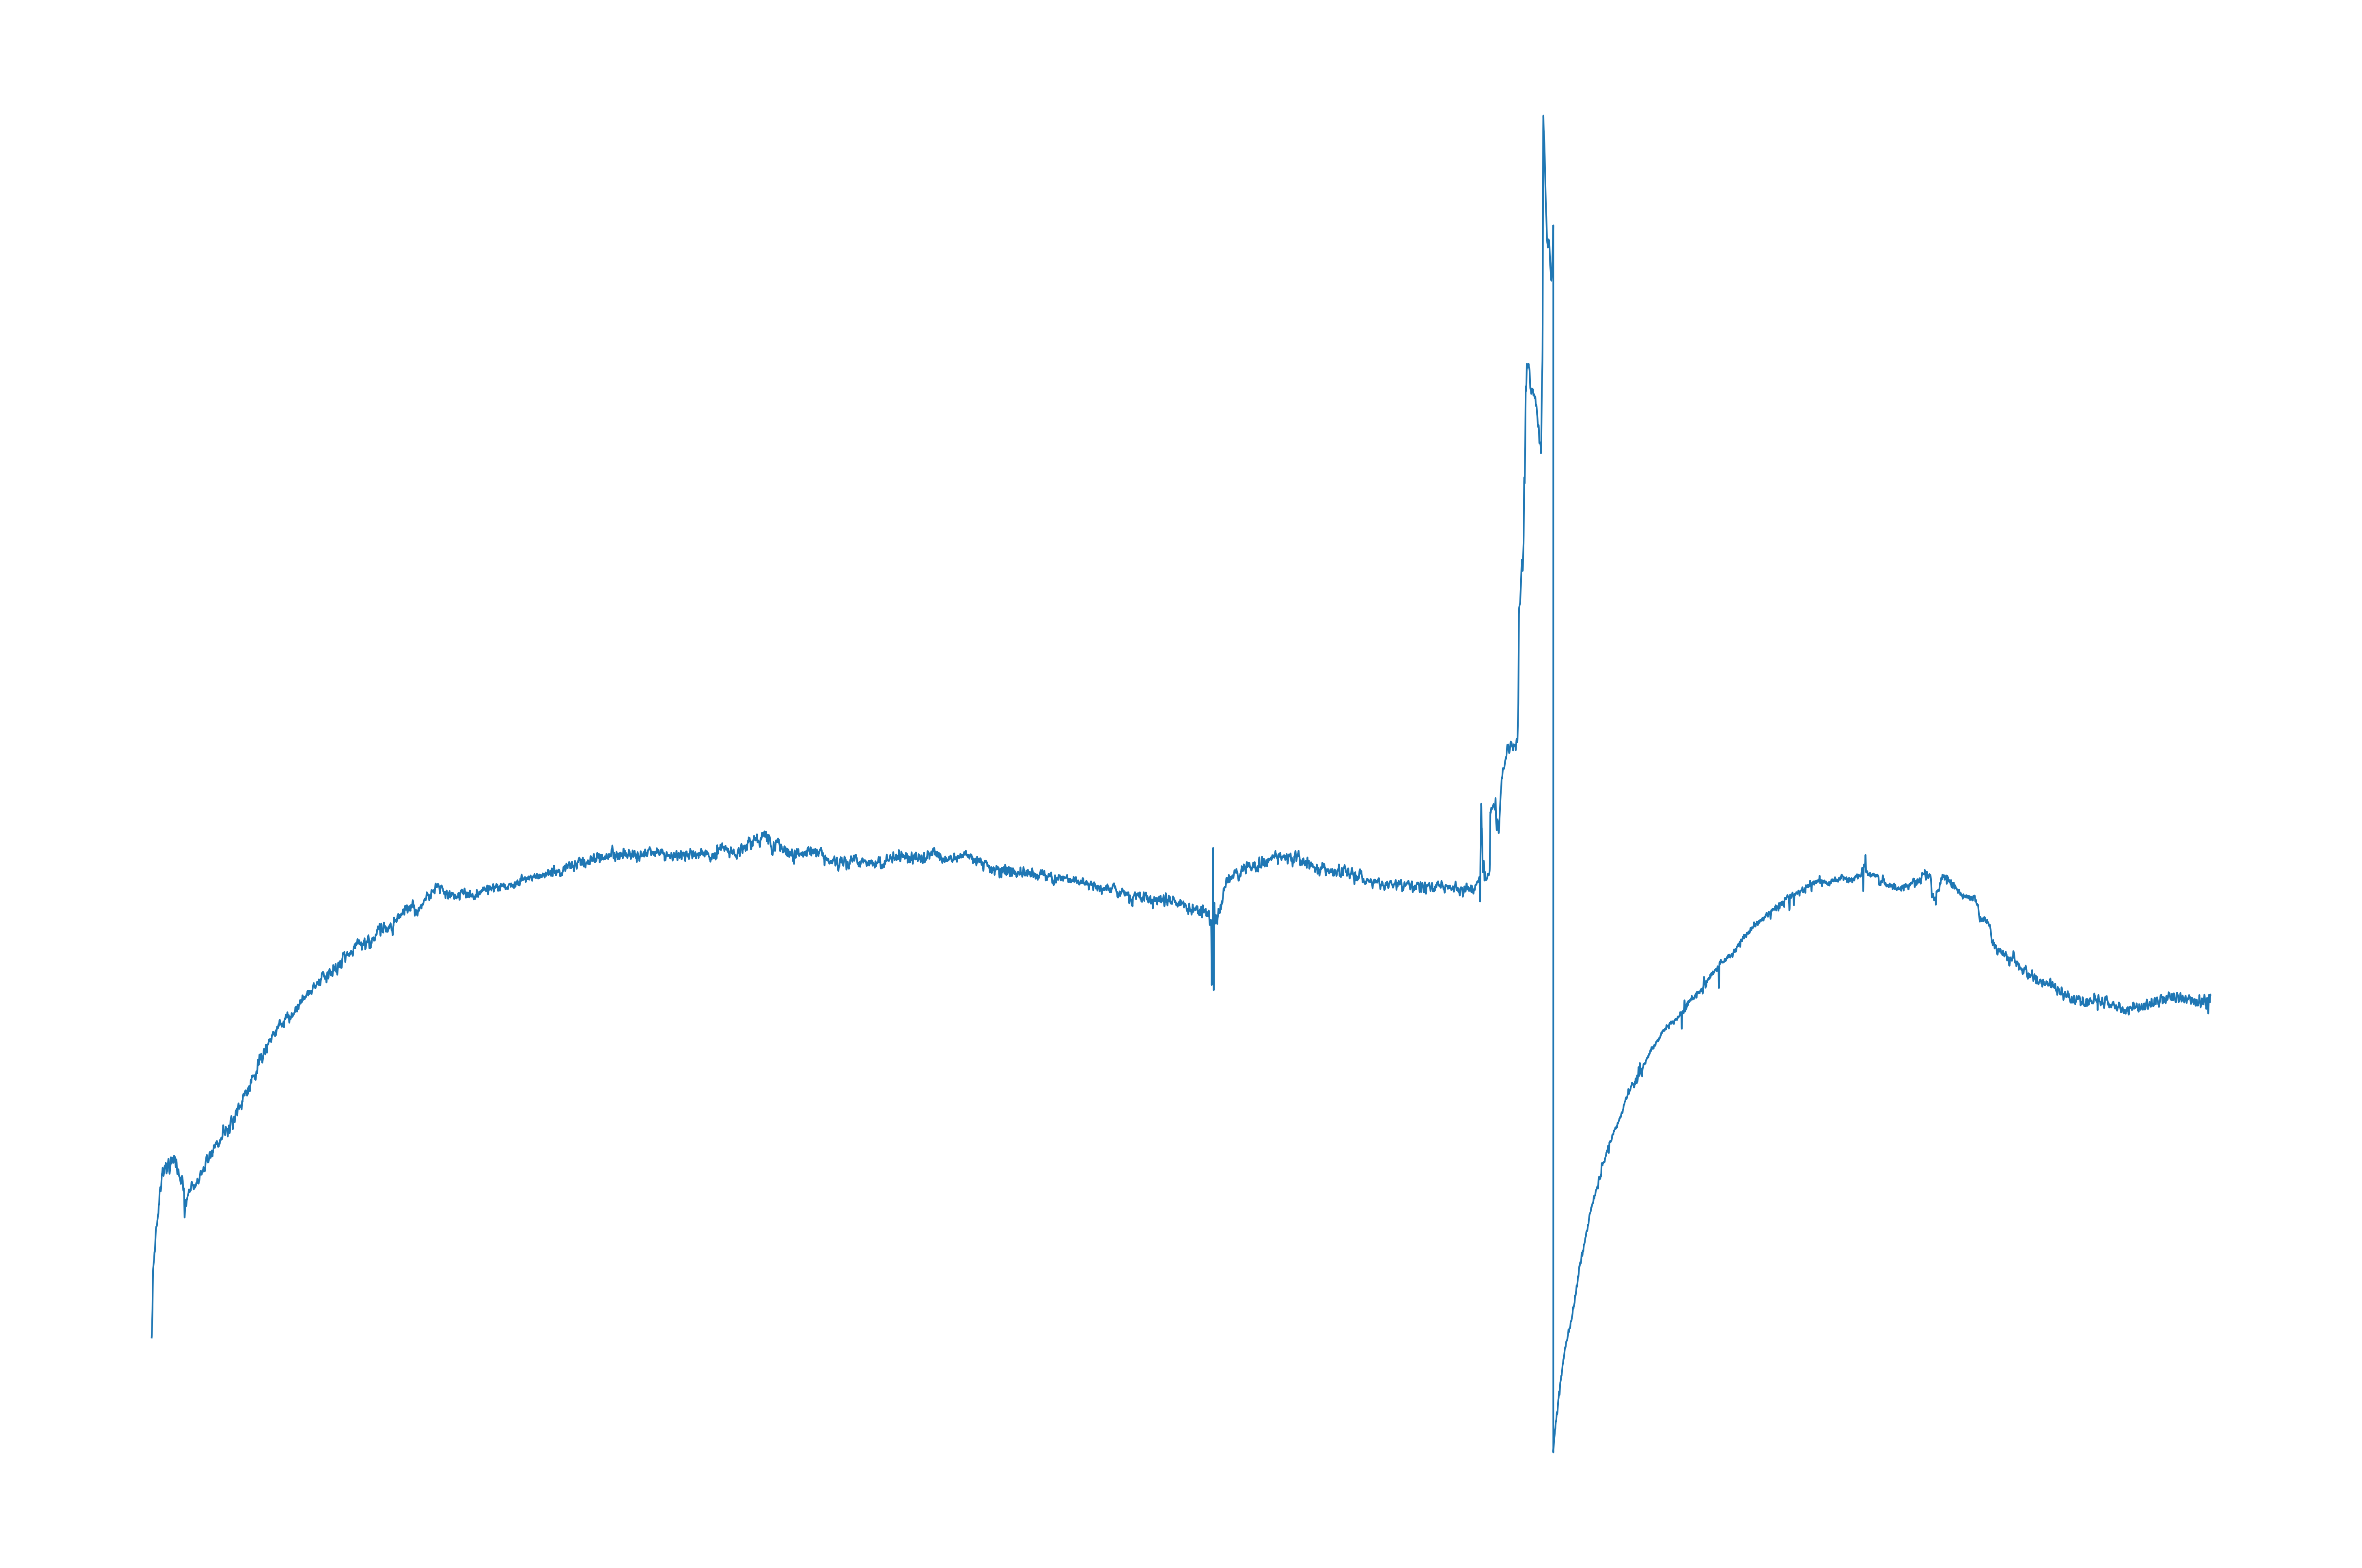

In [25]:
plt.figure(dpi = 1200)
plt.grid(b=False)
plt.axis(False)
plt.plot(np.array(class_c['Signal2']), linewidth = 0.25)
plt.savefig('C_2.png', dpi = 1200)
plt.show()

One intersting point to note is that, after this sudden drop happens in signal 2 in C, signal 1 completly changes behaviour.
Fractal dimension
One method is to make images of the Signal 2 for all classes and scan them (imread) and calculate fractal dimension, found a lot of packages on Github that scan images to find dimension. Limitation is that Scanning the whole data set is not possible(algorithm will be very slow)

In [26]:
#https://github.com/ErikRZH/Fractal-Dimension/blob/master/fractal-dimension.py
def fractal_dimension(Z, threshold=0.8):
    """Returns box-counting dimension of a 2D array.
    Args:
        Z: 2D array to be analysed.
        threshold: Cutoff for converting values in Z to 1 and 0.
    Returns:
        The estimated box counting dimension.
    """

    # Only for 2d image
    assert(len(Z.shape) == 2)

    # From https://github.com/rougier/numpy-100 (#87)
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z < threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))

    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

In [27]:
# for label A, Signal 2
I = imageio.imread("A_2.png", as_gray="True")/255.0    # greyscale image
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.119176338315134


In [28]:
# for Label B, Signal B
I = imageio.imread("B_2.png", as_gray="True")/255.0    # greyscale image
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.3237387073508424


In [29]:
I = imageio.imread("C_2.png", as_gray="True")/255.0
#print(np.min(I))    # Import the image in greyscale
print("Minkowski–Bouligand dimension (computed): ", fractal_dimension(I))

Minkowski–Bouligand dimension (computed):  1.1939407356198235


# Fractal dimension for all the Labels in signal 2:
    For label A, Signal 2: 1.119
    For label B, Signal 2: 1.324
    For label C, Signal 2: 1.194
    
This was expected, one look at the graph and Label B looks more fractal like compared A and C, where A and C seem to follow very smooth trends (uncharacteristic of a fractal), even the changes were not apparent until the whole curve was plotted.